In [9]:
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize

import skimage.draw
import numpy as np

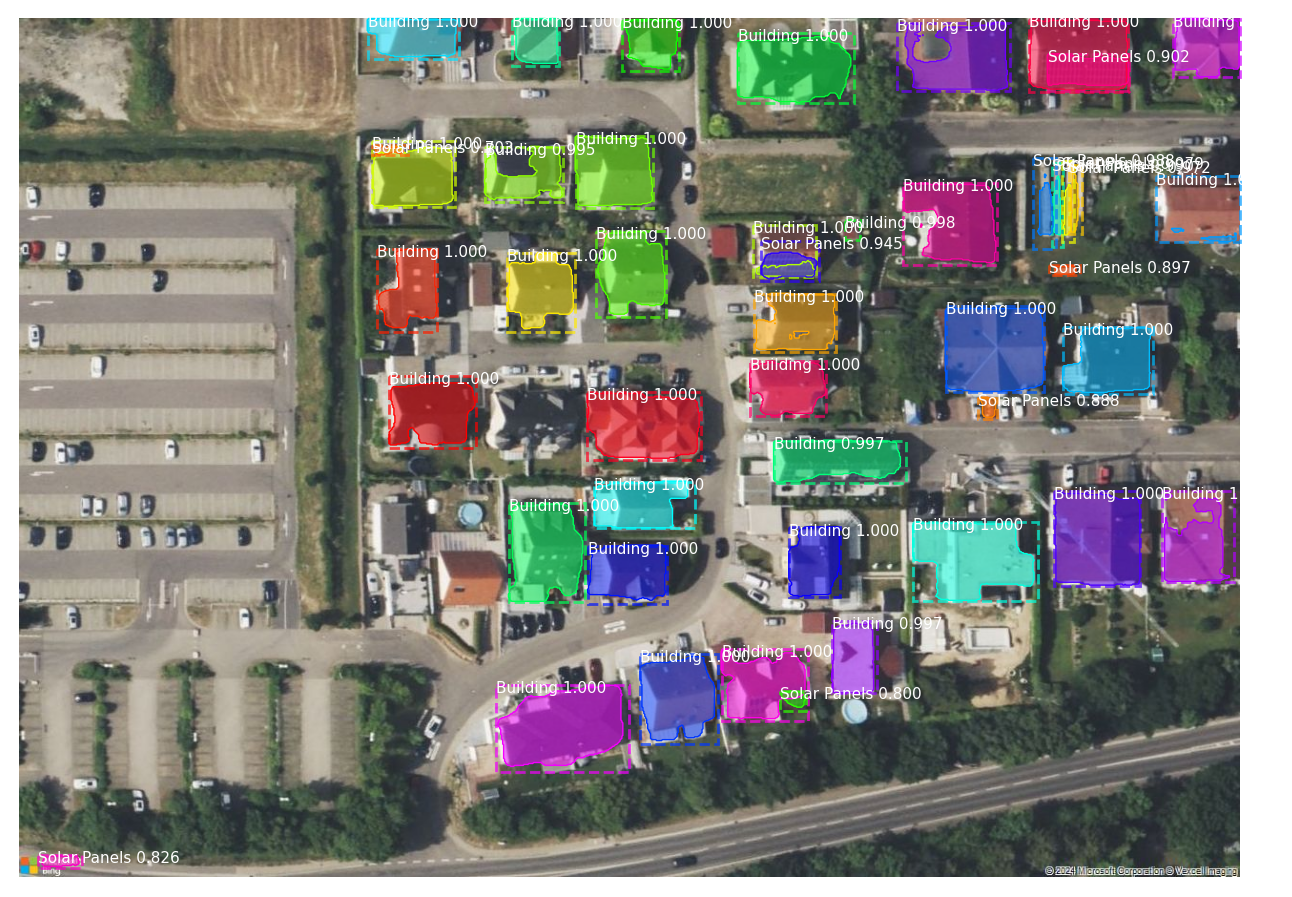

In [18]:
# define the prediction configuration
class PredictionConfig(mrcnn.config.Config):
	# define the name of the configuration
	NAME = "solar_cfg_coco"
	# number of classes (background + solar)
	NUM_CLASSES = 1 + 1
	# Set batch size to 1 since we'll be running inference on
            # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1
	IMAGE_RESIZE_MODE = "square"
	IMAGE_MAX_DIM = 1024

# create config
cfg = PredictionConfig()
#cfg.display()
# define the model
model_solar = mrcnn.model.MaskRCNN(mode='inference', model_dir='logs', config=cfg)
model_houses = mrcnn.model.MaskRCNN(mode='inference', model_dir='logs', config=cfg)
# load model weights
model_solar.load_weights('mrcnn_solar_e10.h5', by_name=True)
model_houses.load_weights('houses_pretrained_weights.h5', by_name=True)

#Test on a single image
test_img = skimage.io.imread("images\map_31097.jpg")
detected_solar = model_solar.detect([test_img])
detected_houses = model_houses.detect([test_img])
results2 = detected_solar[0]
results = detected_houses[0]

#safe for future use, shift id's up one
results2['class_ids'] = [id + 1 for id in results2['class_ids']]
#todo: append the values to other result dict
results['rois'] = np.concatenate([results['rois'], results2['rois']], axis=0)
results['masks'] = np.concatenate([results['masks'], results2['masks']], axis=2)
results['class_ids'] = np.concatenate([results['class_ids'], results2['class_ids']], axis=0)
results['scores'] = np.concatenate([results['scores'], results2['scores']], axis=0)


class_names = ['BG', 'Building', 'Solar Panels']
mrcnn.visualize.display_instances(test_img, results['rois'], results['masks'],
                  results['class_ids'], class_names, results['scores'])